# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Nesse projeto, vamos criar um modelo de previsão de renda de clientes de um banco. Isso pode ajudar a entender a situação financeira de cada cliente na base de dados do banco.


## Etapa 2 Crisp-DM: Entendimento dos dados
Na base de dados utilizada, temos informações pessoais que o cliente disponibiliza para os serviços do banco. Nessa fase, entendemos o que cada variável significa e o seu impacto na variável resposta renda.

### Dicionário de dados
Aqui, vemos informações sobre os dados encontrados em cada coluna da base de dados, como o que significa e o tipo de dado.


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta dos dados             | object       |
| id_cliente              |  Identificador do cliente                           | int64        |
| sexo                    |  Sexo (F ou M)                                      | object       |
| posse_de_veiculo        |  Se possui veículo (True ou False)                  | bool         |
| posse_de_imovel         |  Se possui veículo (True ou False)                  | bool         |
| qtd_filhos              |  Quantidade de filhos                               | int64        |
| tipo_renda              |  Tipo de renda                                      | object       |
| educacao                |  Nível de educação                                  | object       |
| estado_civil            |  Estado civil                                       | object       |
| tipo_residencia         |  Tipo de residência                                 | object       |
| idade                   |  Idade do cliente                                   | int64        |
| tempo_emprego           |  Tempo no emprego atual (anos)                      | float64      |
| qt_pessoas_residencia   |  Número de pessoas morando na mesma residência      | float64      |
| renda                   |  Renda anual do cliente                             | float64      |





#### Carregando os pacotes
Para este projeto, utilizaremos alguns pacotes para importação e manipulação de dados, visualização de gráficos e criação de modelos estatísticos:

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import graphviz
from sklearn import tree

%matplotlib inline
sns.set_theme()

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [296]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [298]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [301]:
prof = ProfileReport(renda, explorative=True, minimal=True)

In [302]:
prof.to_file('./output/renda_analisys.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Observando a análise acima, podemos fazer alguns levantamentos:
- 17,2% da coluna _tempo_emprego_ contém dados faltantes. 
- 65,6% dos dados na coluna _id_cliente_ são distintos. Isso implica que um cliente pode aparecer mais de uma vez na base de dados, em momentos diferentes.
- 69,2% da coluna _qtd_filhos_ é composta por 0's, e outros 29,4% possuem entre 2 e 3 filhos. Mais de 98% da base de dados está abaixo da linha de 4 filhos.
- Como há clientes que aparecem mais de uma vez, é provável que essas não sejam as proporções exatas de quantidade de filhos dos clientes.
- 67,5% dos dados coletados são de clientes do sexo feminino.
- 60,9% dos dados coletados são de clientes sem posse de veículo.
- 67,6% dos dados coletados são de clientes que possuem imóvel.
- 46,9% da base de dados é composta por profissionais assalariados, 21,6% por empresários e 15,9% por pensionistas.
- 42,5% da base de dados é de clientes com educação a nível secundário, 25,5% por clientes com superior completo e 2,8% com superior incompleto.
- Mais de 70% da base de dados é de clientes casados. Solteiros compõem 12% da base de dados.
- 82,8% dos dados coletados são de clientes que moram em casas.
- A média de idade dos clientes é de aproximadamente 44 anos. A mediana da idade é de 43 anos.
- Os 5% mais jovens estão abaixo de 26 anos, e os 5% mais velhos estão acima de 63 anos.
- O desvio padrão na idade dos clientes é de aproximadamente 11 anos.

### Entendimento dos dados - Bivariadas




Aqui, vamos entender a distribuição e impacto das demais variáveis em relação à variável-resposta renda.

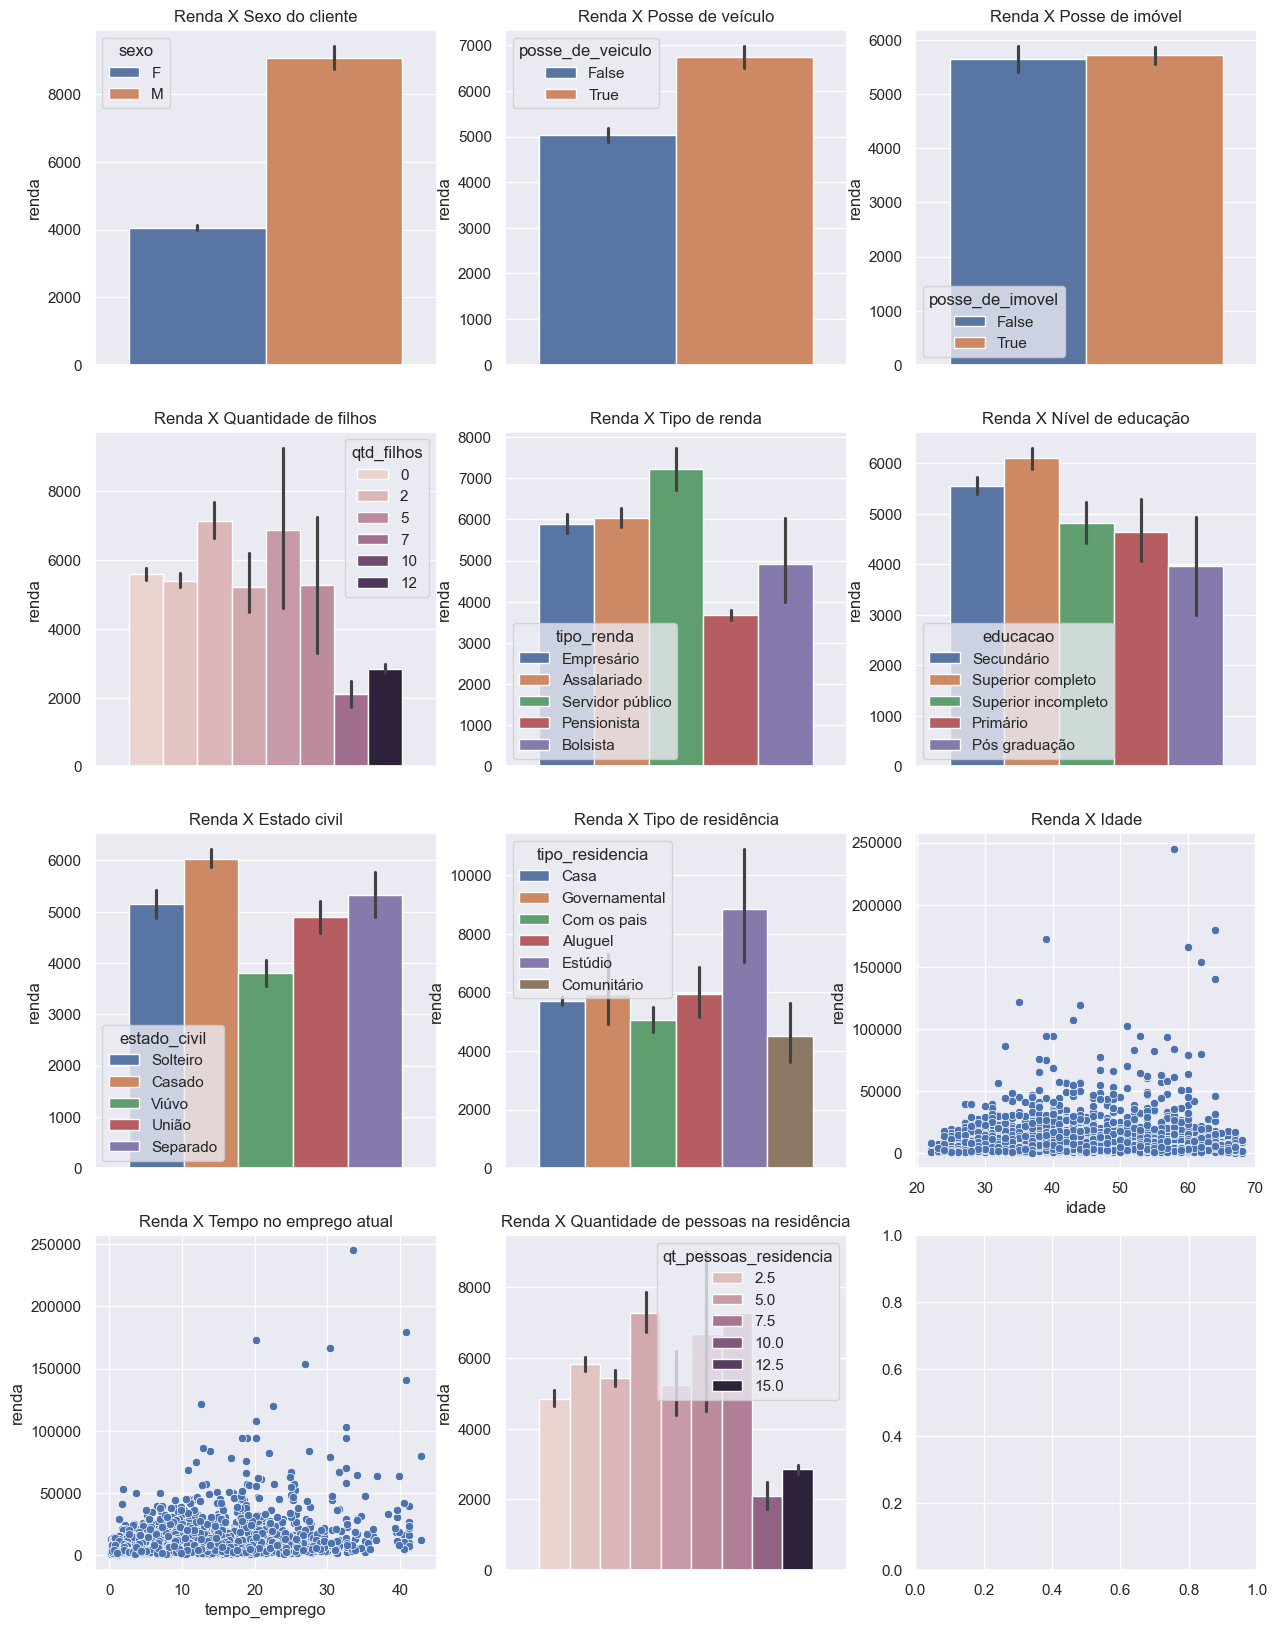

In [307]:
plt.rc('figure', figsize=(15,20))
fig, axes = plt.subplots(4,3)

sns.barplot(y='renda', hue='sexo', data=renda, ax=axes[0,0]).set(title='Renda X Sexo do cliente')
sns.barplot(y='renda', hue='posse_de_veiculo', data=renda, ax=axes[0,1]).set(title='Renda X Posse de veículo')
sns.barplot(y='renda', hue='posse_de_imovel', data=renda, ax=axes[0,2]).set(title='Renda X Posse de imóvel')
sns.barplot(y='renda', hue='qtd_filhos', data=renda, ax=axes[1,0]).set(title='Renda X Quantidade de filhos')
sns.barplot(y='renda', hue='tipo_renda', data=renda, ax=axes[1,1]).set(title='Renda X Tipo de renda')
sns.barplot(y='renda', hue='educacao', data=renda, ax=axes[1,2]).set(title='Renda X Nível de educação')
sns.barplot(y='renda', hue='estado_civil', data=renda, ax=axes[2,0]).set(title='Renda X Estado civil')
sns.barplot(y='renda', hue='tipo_residencia', data=renda, ax=axes[2,1]).set(title='Renda X Tipo de residência')
sns.scatterplot(x='idade', y='renda', data=renda, ax=axes[2,2]).set(title='Renda X Idade')
sns.scatterplot(x='tempo_emprego', y='renda', data=renda, ax=axes[3,0]).set(title='Renda X Tempo no emprego atual')
sns.barplot(y='renda', hue='qt_pessoas_residencia', data=renda, ax=axes[3,1]).set(title='Renda X Quantidade de pessoas na residência')

plt.show()
plt.close()

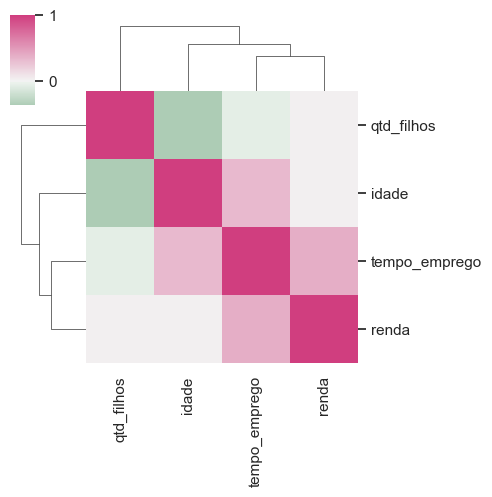

In [308]:
cmap = sns.diverging_palette(h_neg=135, h_pos=350, as_cmap=True, sep=5, center='light')
sns.clustermap((renda.drop(['data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil',
                            'tipo_residencia', 'qt_pessoas_residencia', 'Unnamed: 0'], axis=1).corr()), figsize=(5,5), center=0, cmap=cmap)

Algumas observações:
- Apesar da maioria dos clientes cadastrados serem do sexo feminino a renda deste grupo, em média, é inferior à metade da renda do grupo do sexo masculino.
- Há uma diferença segura de renda entre os que possuem e os que não possuem veículo.
- Existe uma correlação entre tempo de emprego e renda.
- Existe uma correlação inversa entre quantidade de filhos e idade.
- Quem mora em estúdio pode ter uma renda maior, porém são uma pequena minoria nos dados.
- A mesma coisa vale para servidores públicos.
- Clientes casados tendem a ter uma renda suavemente maior que os demais e constituem a maior parcela da base de dados.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [311]:
renda = renda.sort_values('data_ref').drop(['Unnamed: 0'], axis=1).reset_index().drop(['index'], axis=1)

In [312]:
renda.head(3)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,10640,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,2157.97
2,2015-01-01,368,M,True,False,0,Empresário,Secundário,Separado,Com os pais,28,1.523288,1.0,3688.80


**Tendo em mente que temos clientes duplicados na base de dados, podemos:**
- Remover as duplicatas e manter apenas os dados mais recentes de cada cliente;
- Manter todos os registros de cada cliente.

Aqui, vamos manter todos os registros. A intenção é ter uma previsão de renda para novos clientes com base nos dados disponibilizados de clientes atuais - os clientes que tiveram alteração nos dados com o passar do tempo estiveram em posições diferentes na vida e carreira, o que pode ajudar o nosso modelo a fazer as previsões com base nas circustâncias em que eles já estiveram.

**Dados faltantes:** apenas a coluna _tempo_emprego_ contém dados faltantes. Vamos preenchê-los com a mediana dos valores da coluna ao invés da média, visto que temos outliers nos dados. Assim, não perdemos 17% dos dados e deixamos a coluna apropriada para criação de modelos.

In [315]:
renda['tempo_emprego'] = renda['tempo_emprego'].fillna(renda['tempo_emprego'].median())

**Outliers**: é essencial que os outliers na variável reposta renda sejam tratados, uma vez que eles podem afetar significativamente o desempenho do modelo. Aqui, vamos substituir os os valores acima de 100.000 e os abaixo de 500 pela mediana da renda dos clientes. Assim não perdemos os dados e melhoramos o desempenho do modelo.

In [317]:
renda.loc[(renda['renda'] > 100000) | (renda['renda'] < 500), 'renda'] = renda.renda.median()

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Vamos comparar duas possibilidades: uma árvore de regressão e uma regressão linear múltipla.

### Regressão linear múltipla:

In [321]:
X = renda.drop(columns=['renda']).copy()
y = renda['renda'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=100)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [322]:
md = smf.ols('''renda ~
              tempo_emprego + posse_de_veiculo + tipo_renda + sexo + np.log(idade)
              + np.log(qtd_filhos+.01) + estado_civil + data_ref + tipo_residencia + educacao'''
              , df_train)

Com as variáveis dependentes definidas, vamos fazer um loop para procurar os parâmetros de regressão que resultam no melhor $R^2$ possível para o modelo:

In [324]:
L1_wts = np.arange(.1, 1, .1)
alphas  = np.arange(.1, 1, .1)

cols = ['R2_treino', 'R2_teste', 'alpha', 'L1_wt', 'AIC']
lst = []

In [325]:
for alpha in alphas:
        for L1_wt in L1_wts:
            reg = md.fit_regularized(method='elastic_net', refit=True, L1_wt=L1_wt, alpha=alpha)
            lst.append([reg.rsquared, r2_score(y_test, reg.predict(sm.add_constant(X_test))), alpha, L1_wt, reg.aic])

R2s = pd.DataFrame(lst, columns=cols)

In [326]:
R2s[R2s['R2_teste'] == R2s['R2_teste'].max()]

,R2_treino,R2_teste,alpha,L1_wt,AIC
77,0.281736,0.295591,0.9,0.6,227745.271671


Com o modelo de regressão linear múltipla, obtemos um $R^2$ de 0,295.

### Árvore de regressão:

Vamos treinar uma árvore simples, com profundidade 10 e quantidade mínima de amostras por folha de 10:

In [330]:
X = renda.drop(columns=['renda']).copy()
y = renda['renda'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=100)

### Rodando o modelo


In [333]:
X_train = pd.get_dummies(X_train.drop(['id_cliente'], axis=1))
X_test = pd.get_dummies(X_test.drop(['id_cliente'], axis=1))

regr = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=0)
regr.fit(X_train, y_train)

yPred = regr.predict(X_test)

print(f'Profundidade: {regr.tree_.max_depth}')
print(f'R^2 na base de testes: {regr.score(X_test, y_test):.2f}')
print(f'MSE na base de testes:{mean_squared_error(y_test, regr.predict(X_test)):.2f}')

Profundidade: 10
R^2 na base de testes: 0.40
MSE na base de testes:28680776.61


O $R^2$ da árvore é de 0,4, maior que os 0,295 do modelo de regressão linear múltipla. Vamos usar este modelo.

## Etapa 5 Crisp-DM: Avaliação dos resultados


Vamos comparar as relações bivariadas de renda real e de renda predita com as variáveis independentes, lado a lado.

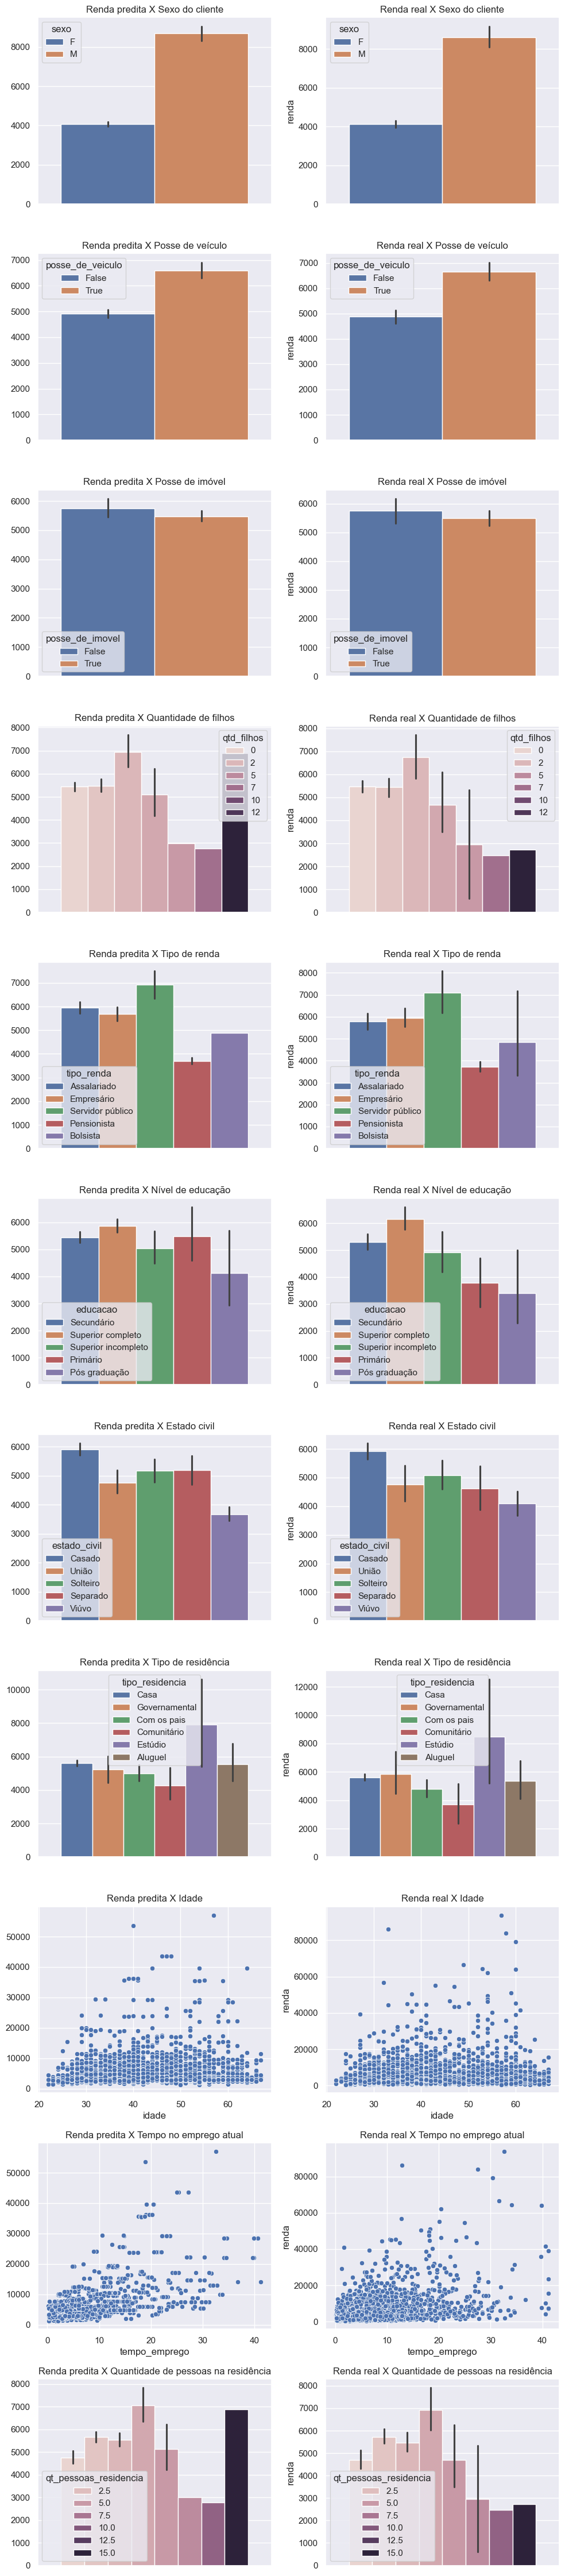

In [337]:
vis = df_test

plt.rc('figure', figsize=(10,45))

fig, axes = plt.subplots(11,2)

sns.barplot(y=yPred, hue=vis['sexo'], ax=axes[0,0]).set(title='Renda predita X Sexo do cliente')
sns.barplot(y='renda', hue='sexo', data=vis, ax=axes[0,1]).set(title='Renda real X Sexo do cliente')

sns.barplot(y=yPred, hue=vis['posse_de_veiculo'], ax=axes[1,0]).set(title='Renda predita X Posse de veículo')
sns.barplot(y='renda', hue='posse_de_veiculo', data=vis, ax=axes[1,1]).set(title='Renda real X Posse de veículo')

sns.barplot(y=yPred, hue=vis['posse_de_imovel'], ax=axes[2,0]).set(title='Renda predita X Posse de imóvel')
sns.barplot(y='renda', hue='posse_de_imovel', data=vis, ax=axes[2,1]).set(title='Renda real X Posse de imóvel')

sns.barplot(y=yPred, hue=vis['qtd_filhos'], ax=axes[3,0]).set(title='Renda predita X Quantidade de filhos')
sns.barplot(y='renda', hue='qtd_filhos', data=vis, ax=axes[3,1]).set(title='Renda real X Quantidade de filhos')

sns.barplot(y=yPred, hue=vis['tipo_renda'], ax=axes[4,0]).set(title='Renda predita X Tipo de renda')
sns.barplot(y='renda', hue='tipo_renda', data=vis, ax=axes[4,1]).set(title='Renda real X Tipo de renda')

sns.barplot(y=yPred, hue=vis['educacao'], ax=axes[5,0]).set(title='Renda predita X Nível de educação')
sns.barplot(y='renda', hue='educacao', data=vis, ax=axes[5,1]).set(title='Renda real X Nível de educação')

sns.barplot(y=yPred, hue=vis['estado_civil'], ax=axes[6,0]).set(title='Renda predita X Estado civil')
sns.barplot(y='renda', hue='estado_civil', data=vis, ax=axes[6,1]).set(title='Renda real X Estado civil')

sns.barplot(y=yPred, hue=vis['tipo_residencia'], ax=axes[7,0]).set(title='Renda predita X Tipo de residência')
sns.barplot(y='renda', hue='tipo_residencia', data=vis, ax=axes[7,1]).set(title='Renda real X Tipo de residência')

sns.scatterplot(x=vis['idade'], y=yPred, ax=axes[8,0]).set(title='Renda predita X Idade')
sns.scatterplot(x='idade', y='renda', data=vis, ax=axes[8,1]).set(title='Renda real X Idade')

sns.scatterplot(x=vis['tempo_emprego'], y=yPred, ax=axes[9,0]).set(title='Renda predita X Tempo no emprego atual')
sns.scatterplot(x='tempo_emprego', y='renda', data=vis, ax=axes[9,1]).set(title='Renda real X Tempo no emprego atual')

sns.barplot(y=yPred, hue=vis['qt_pessoas_residencia'], ax=axes[10,0]).set(title='Renda predita X Quantidade de pessoas na residência')
sns.barplot(y='renda', hue='qt_pessoas_residencia', data=vis, ax=axes[10,1]).set(title='Renda real X Quantidade de pessoas na residência')

fig.tight_layout()
plt.show()
plt.close()

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

No código abaixo, simulamos a entrada de novos dados, em um dataframe que com as mesmas colunas que existem nos dados de treino:

In [340]:
novos_dados = pd.DataFrame(columns=renda.columns)

for c in novos_dados.columns:
    novos_dados[c] = np.random.permutation(renda[c].values)

novos_dados = novos_dados.drop('renda', axis=1)

Agora, predizemos a renda desses novos dados usando o modelo criado:

In [342]:
novos_dados['pred_renda'] = reg.predict(sm.add_constant(novos_dados))

E exportamos a base de dados:

In [344]:
novos_dados.to_csv('./output/novos_dados.csv')

Vamos ver como está a distribuição de renda de acordo com as análises bivariadas:

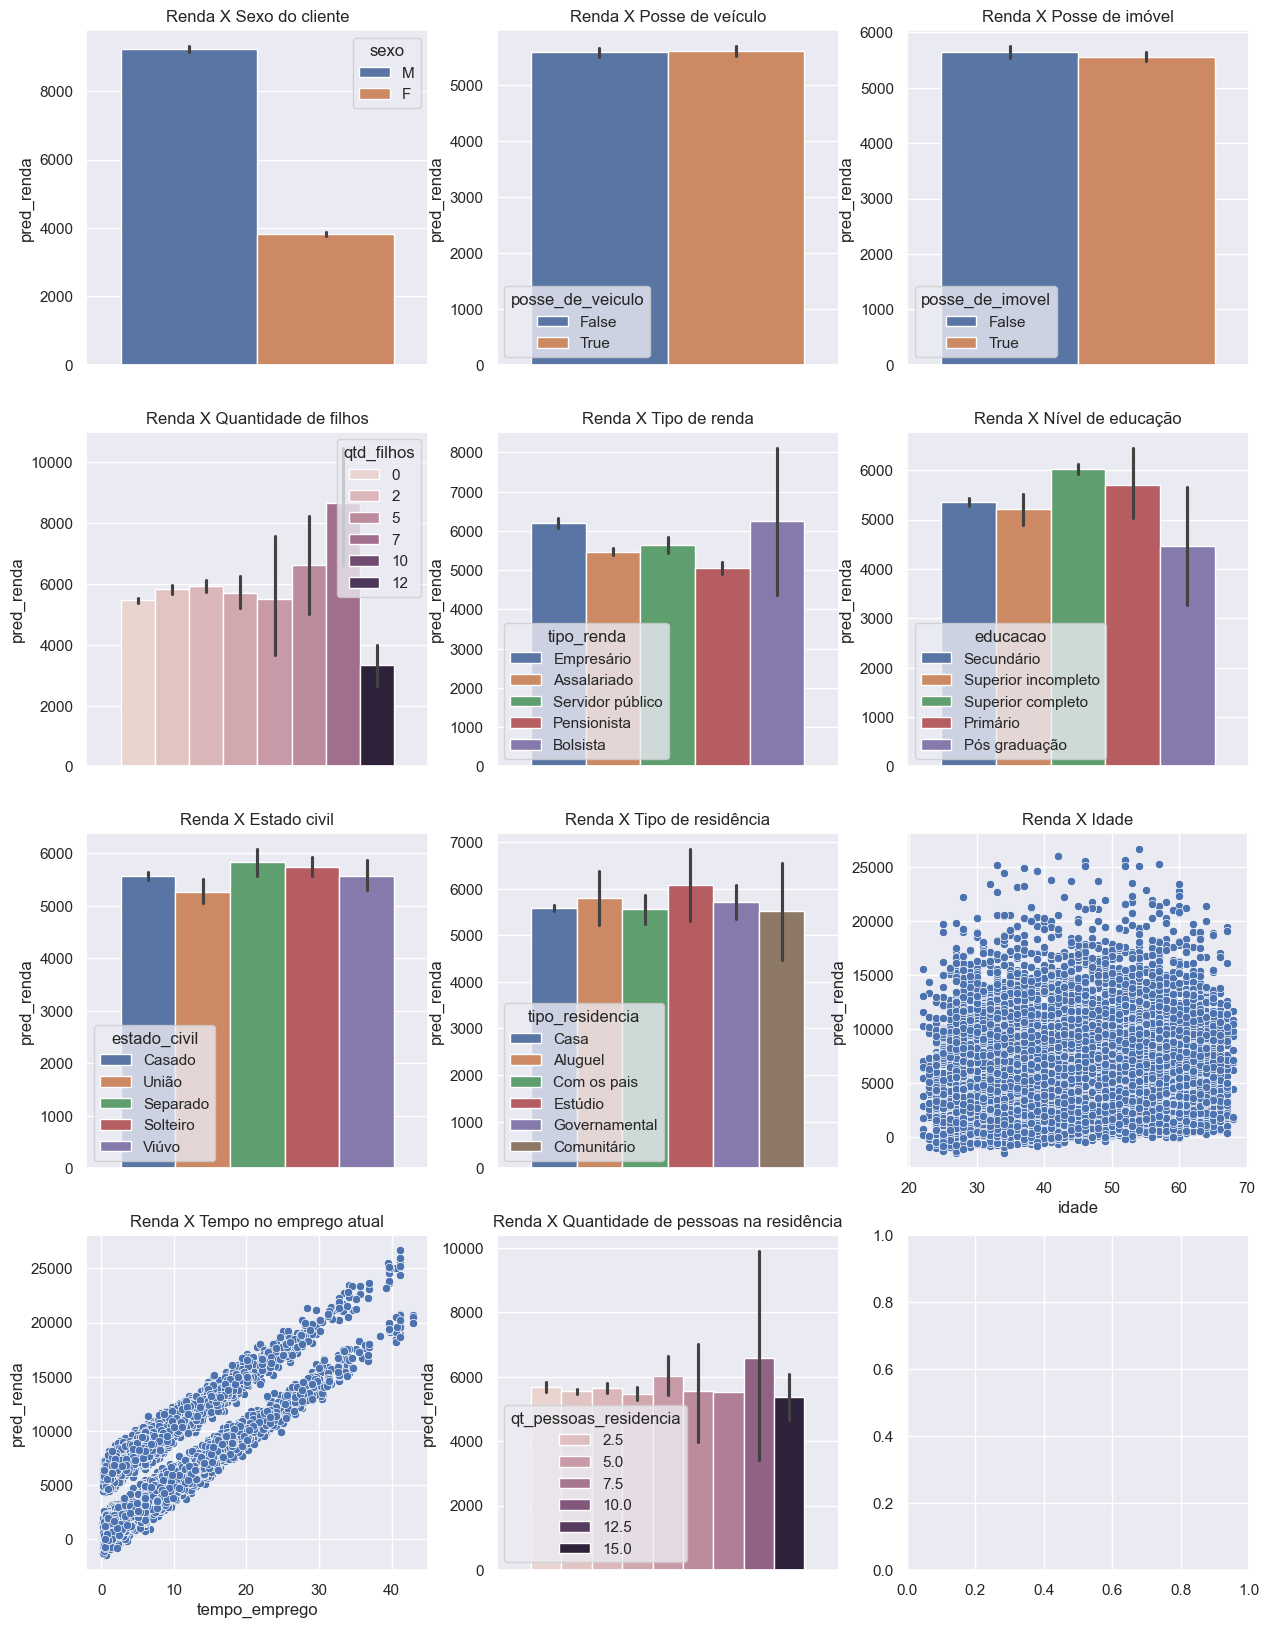

In [355]:
plt.rc('figure', figsize=(15,20))
fig, axes = plt.subplots(4,3)

sns.barplot(y='pred_renda', hue='sexo', data=novos_dados, ax=axes[0,0]).set(title='Renda X Sexo do cliente')
sns.barplot(y='pred_renda', hue='posse_de_veiculo', data=novos_dados, ax=axes[0,1]).set(title='Renda X Posse de veículo')
sns.barplot(y='pred_renda', hue='posse_de_imovel', data=novos_dados, ax=axes[0,2]).set(title='Renda X Posse de imóvel')
sns.barplot(y='pred_renda', hue='qtd_filhos', data=novos_dados, ax=axes[1,0]).set(title='Renda X Quantidade de filhos')
sns.barplot(y='pred_renda', hue='tipo_renda', data=novos_dados, ax=axes[1,1]).set(title='Renda X Tipo de renda')
sns.barplot(y='pred_renda', hue='educacao', data=novos_dados, ax=axes[1,2]).set(title='Renda X Nível de educação')
sns.barplot(y='pred_renda', hue='estado_civil', data=novos_dados, ax=axes[2,0]).set(title='Renda X Estado civil')
sns.barplot(y='pred_renda', hue='tipo_residencia', data=novos_dados, ax=axes[2,1]).set(title='Renda X Tipo de residência')
sns.scatterplot(x='idade', y='pred_renda', data=novos_dados, ax=axes[2,2]).set(title='Renda X Idade')
sns.scatterplot(x='tempo_emprego', y='pred_renda', data=novos_dados, ax=axes[3,0]).set(title='Renda X Tempo no emprego atual')
sns.barplot(y='pred_renda', hue='qt_pessoas_residencia', data=novos_dados, ax=axes[3,1]).set(title='Renda X Quantidade de pessoas na residência')

plt.show()
plt.close()